In [43]:
# d) what if we run a 10-day sale starting on Day 15? (boosting everyone's purchase rate by 1%)
    # Does this change which variant earns more total money by Day 30 ?

# First of all, the necessary libraries imported to the notebook.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def retention_curve(d1, d3, d7, d14, maximum=30):
    # Calculating retention points with log-linear interpolation for not known days (From D0 to D14) 
    known_days = np.array([0,1,3,7,14])
    reten_rates = ([1.0, d1, d3, d7, d14])
    reten_days = np.arange(0, maximum + 1)
    log_reten_known = np.log(reten_rates)
    log_reten_days = np.interp(reten_days, known_days, log_reten_known)
    reten_back  = np.exp(log_reten_days)
    
    # After D14 
    slope = (np.log(d14) - np.log(d7)) / 7
    for day in range(15, maximum + 1):
        reten_back[day] = np.exp(np.log(d14) + slope * (day - 14))
    
    return pd.Series(reten_back, index=reten_days, name="retention")


# The question asks for total money by DAY 30, so we use same logic at the below piece of code that is programmed in the "retention_curve.ipynb".
A = retention_curve(0.53, 0.27, 0.17, 0.06, maximum=30)
B = retention_curve(0.48, 0.25, 0.19, 0.09, maximum=30)

In [52]:
# This piece of code programms the two parts of daily active users : D0-D14 and D26-D30 
installs = 20000

A_dau_14 = installs * A.cumsum().loc[0:14]
B_dau_14 = installs * B.cumsum().loc[0:14]

A_dau_26_30 = installs * A.cumsum().loc[26:30]
B_dau_26_30 = installs * B.cumsum().loc[26:30]

print("Daily active users between D0-D14 and D26-D30 for Variant A: ", round((sum(A_dau_14) + sum(A_dau_26_30))), "\n")
print("Daily active users between D0-D14 and D26-D30 for Variant B: ", round((sum(B_dau_14) + sum(B_dau_26_30))))

Daily active users between D0-D14 and D26-D30 for Variant A:  1232339 

Daily active users between D0-D14 and D26-D30 for Variant B:  1267623


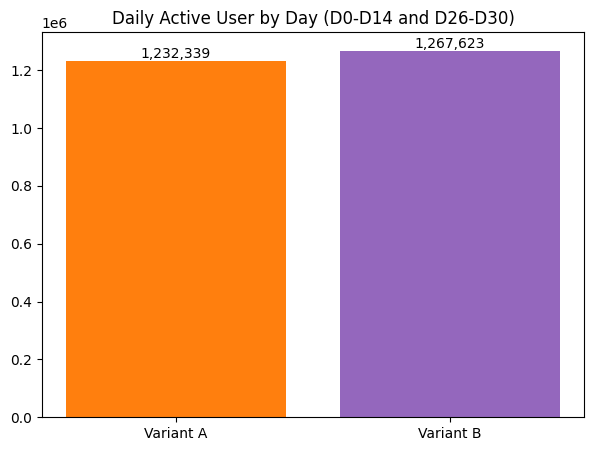

In [60]:
plt.figure(figsize=(7,5))
bar_colors = ['tab:orange', 'tab:purple']
plt.bar(["Variant A", "Variant B"], [sum(A_dau_14) + sum(A_dau_26_30), sum(B_dau_14) + sum(B_dau_26_30)], color=bar_colors)
plt.title("Daily Active User by Day (D0-D14 and D26-D30)")
plt.text(0, sum(A_dau_14) + sum(A_dau_26_30), f"{sum(A_dau_14) + sum(A_dau_26_30):,.0f}", ha="center", va="bottom")
plt.text(1, sum(B_dau_14) + sum(B_dau_26_30), f"{sum(B_dau_14) + sum(B_dau_26_30):,.0f}", ha="center", va="bottom")
plt.show()

After several times of calculations, I realize that every calculation for Variant B's daily active users was more than Variant A's DAU. This is because of our retention points. When we log-linear interpolated the not known days, especially after D7, the Variant B's retention points were more higher than Variant A's. This could be mislead the other questions which we prove that with our total money calculations before. But let's see what's this will lead us. 

In [63]:
A_purch_ratio = 0.0305
B_purch_ratio = 0.0315

# Calculating Daily Purchase Revenue: DPR = A(DAU(t)) * daily purchase ratio * $1 

# First of, the calculations was programmed for Variant A D0-D14 and D26-D30. 
A_DPR_14 = A_dau_14 * A_purch_ratio * 1
A_DPR_26_30 = A_dau_26_30 * A_purch_ratio * 1

# Then, Variant B was praogrammed same like Variant A.
B_DPR_14 = B_dau_14 * B_purch_ratio * 1
B_DPR_26_30 = B_dau_26_30 * B_purch_ratio * 1

total_dpr_A = sum(A_DPR_14) + sum(A_DPR_26_30)
total_dpr_B = sum(B_DPR_14) + sum(B_DPR_26_30)

print("The Purchase Revenue for Variant A by D0-D14 and D26-D30 is: ", round(total_dpr_A), "\n")
print("The Purchase Revenue for Variant B by D0-D14 and D26-D30 is: ", round(total_dpr_B))

The Purchase Revenue for Variant A by D0-D14 and D26-D30 is:  37586 

The Purchase Revenue for Variant B by D0-D14 and D26-D30 is:  39930


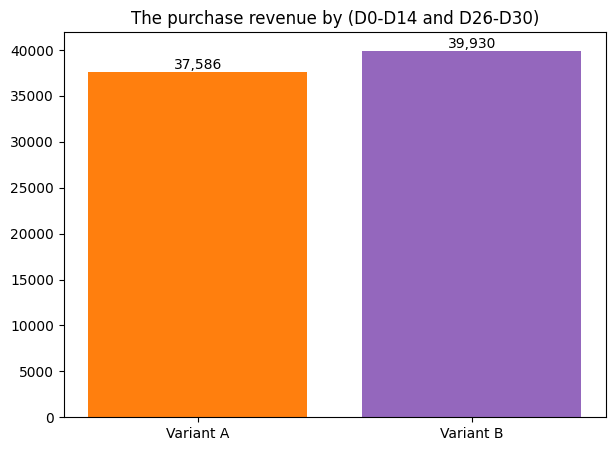

In [64]:
plt.figure(figsize=(7,5))
bar_colors = ['tab:orange', 'tab:purple']
plt.bar(["Variant A", "Variant B"], [total_dpr_A, total_dpr_B], color=bar_colors)
plt.title("The purchase revenue by (D0-D14 and D26-D30)")
plt.text(0, total_dpr_A, f"{total_dpr_A:,.0f}", ha="center", va="bottom")
plt.text(1, total_dpr_B, f"{total_dpr_B:,.0f}", ha="center", va="bottom")
plt.show()

Due to the fact that, DAU of Variant B is higher than Variant A, in-game purchasing likely to be higher than Varint A's purchasing revenue. 

In [66]:
# Calculating Ad Revenue(t)= (AD Impresssion/DAU) * eCPM * DAU(t) 
A_eCPM = 9.80
B_eCPM = 10.80

A_Ad_DAU = 2.3
B_Ad_DAU = 1.6

A_Ad_Revenue_14 = A_Ad_DAU * (A_eCPM / 1000) * A_dau_14
B_Ad_Revenue_14 = B_Ad_DAU * (B_eCPM / 1000) * B_dau_14

A_Ad_Revenue_25_30 = A_Ad_DAU * (A_eCPM / 1000) * A_dau_25_30
B_Ad_Revenue_25_30 = B_Ad_DAU * (B_eCPM / 1000) * B_dau_25_30

total_Ad_Rev_A = sum(A_Ad_Revenue_14) + sum(A_Ad_Revenue_25_30)
total_Ad_Rev_B = sum(B_Ad_Revenue_14) + sum(B_Ad_Revenue_25_30)

print("The Ad Revenue for Variant A by D0-D14 and D26-D30 is: ", round(total_Ad_Rev_A), "\n")
print("The Ad Revenue for Variant B by D0-D14 and D26-D30 is: ", round(total_Ad_Rev_B))

The Ad Revenue for Variant A by D0-D14 and D26-D30 is:  29571 

The Ad Revenue for Variant B by D0-D14 and D26-D30 is:  23412


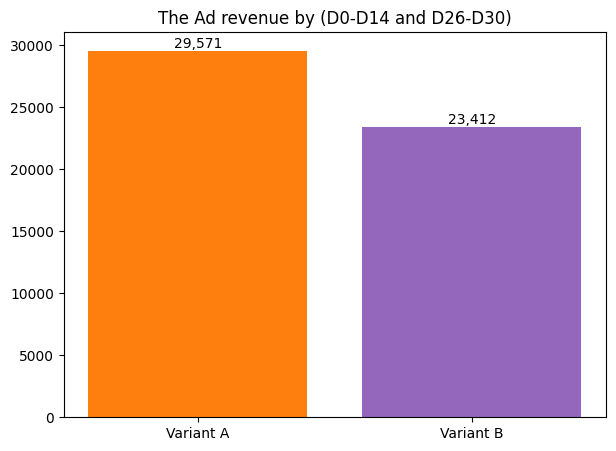

In [68]:
plt.figure(figsize=(7,5))
bar_colors = ['tab:orange', 'tab:purple']
plt.bar(["Variant A", "Variant B"], [total_Ad_Rev_A, total_Ad_Rev_B], color=bar_colors)
plt.title("The Ad revenue by (D0-D14 and D26-D30)")
plt.text(0, total_Ad_Rev_A, f"{total_Ad_Rev_A:,.0f}", ha="center", va="bottom")
plt.text(1, total_Ad_Rev_B, f"{total_Ad_Rev_B:,.0f}", ha="center", va="bottom")
plt.show()

In spite of the fact that, Variant A's Ad Impression / DAU is much higher than Variant B's so this insight is very understable because Variant A's Ad's has more viewers and the metric of eCPM (Ad revenue per 1000 view) is also higher than Variant B's.   

In [47]:
A_dau_15_25 = installs * A.cumsum().loc[15:25]
B_dau_15_25 = installs * B.cumsum().loc[15:25]

A_purch_ratio_new = 0.0405
B_purch_ratio_new = 0.0

total_dau_sale = sum(A_dau_15_25) + sum(B_dau_15_25)
print(round(total_dau_sale))

1769978


In [69]:
# Calculating Daily Purchase Revenue: DPR = A(DAU(t)) * daily purchase ratio * $1
A_DPR_15_25 = A_dau_15_25 * A_purch_ratio_new * 1
B_DPR_15_25 = B_dau_15_25 * B_purch_ratio_new * 1

print("Between D15-D25 sale season , Variant A purchase revenue will be: ", round(sum(A_DPR_15_25)), "\n")
print("Between D15-D25 sale season , Variant B purchase revenue will be: ", round(sum(B_DPR_15_25)))

Between D15-D25 sale season , Variant A purchase revenue will be:  34597 

Between D15-D25 sale season , Variant B purchase revenue will be:  38003


The explanations that have been made in the previous (D0-D14) still valids in here.

In [72]:
# Calculating Ad Revenue(t)= (AD Impresssion/DAU) * eCPM * DAU(t) by Day 30
A_eCPM = 9.80
B_eCPM = 10.80

A_Ad_DAU = 2.3
B_Ad_DAU = 1.6

A_Ad_Revenue_15_25 = A_Ad_DAU * (A_eCPM / 1000) * A_dau_15_25
B_Ad_Revenue_15_25 = B_Ad_DAU * (B_eCPM / 1000) * B_dau_15_25

print("The Ad Revenue for Variant A by D15-D25 is: ", sum((A_Ad_Revenue_15_25)))
print("The Ad Revenue for Variant B is D15-D25 is: ", sum(((B_Ad_Revenue_15_25))))

The Ad Revenue for Variant A by D15-D25 is:  19254.616174510447
The Ad Revenue for Variant B is D15-D25 is:  15823.909638137411


In [79]:
# Calculating total money for this question for Variant A:
total_money_A = sum(A_DPR_14) + sum(A_DPR_26_30) + sum(A_DPR_15_25) + sum(A_Ad_Revenue_15_25) + sum(A_Ad_Revenue_14) + sum(A_Ad_Revenue_25_30)
print("Variant A will be earn by Day 30: ", total_money_A)

total_money_B = sum(B_DPR_14) + sum(B_DPR_26_30) + sum(B_DPR_15_25) + sum(B_Ad_Revenue_15_25) + sum(B_Ad_Revenue_14) + sum(B_Ad_Revenue_25_30)
print("Variant B will be earn by Day 30: ", total_money_B, "\n")

if total_money_A > total_money_B:
    print("Variant A will earn the most total money by Day 30: ", round(total_money_A))
else:
    print("Variant B will earn the most total money by Day 30: ", round(total_money_B))

Variant A will be earn by Day 30:  121009.20868601931
Variant B will be earn by Day 30:  117168.72191197041 

Variant A will earn the most total money by Day 30:  121009


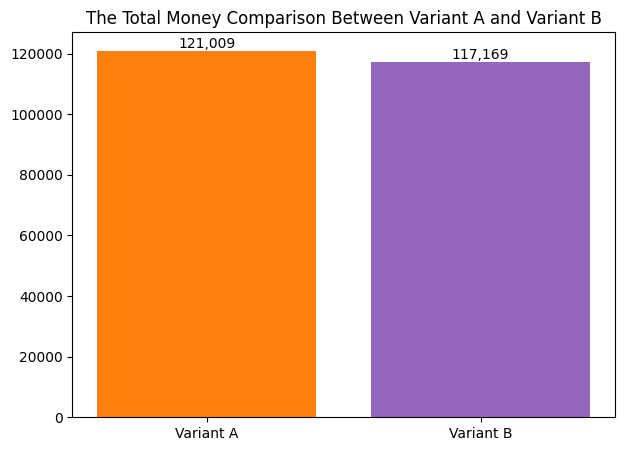

In [81]:
plt.figure(figsize=(7,5))
bar_colors = ['tab:orange', 'tab:purple']
plt.bar(["Variant A", "Variant B"], [total_money_A, total_money_B], color=bar_colors)
plt.title("The Total Money Comparison Between Variant A and Variant B")
plt.text(0, total_money_A, f"{total_money_A:,.0f}", ha="center", va="bottom")
plt.text(1, total_money_B, f"{total_money_B:,.0f}", ha="center", va="bottom")
plt.show()

Although, Variant B's DAU is higher than A's, also purchasing revenue is higher than Variant A's but in the long term with Ad revenue Variant A would be more accurate choice than Variant B. Again, we do not need to change our choice and stick up with Variant A. 